### Collaborative Filtering - SVD - relative rating in a session by counting interaction actions, everything else is zero

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

from collections import Counter
from matplotlib import pyplot as plt

from tqdm.auto import tqdm

In [2]:
# Create and register a new `tqdm` instance with `pandas`
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()

In [3]:
interaction_action_types = {
    'clickout item',
    'interaction item rating',
    'interaction item info',
    'interaction item image',
    'interaction item deals',
    'search for item'
}

In [4]:
df = pd.read_csv('../data/train_split.csv')

In [5]:
df

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
5,00RL8Z82B2Z1,aff3928535f48,1541037532,6,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
6,00RL8Z82B2Z1,aff3928535f48,1541037532,7,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
7,00RL8Z82B2Z1,aff3928535f48,1541037532,8,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
8,00RL8Z82B2Z1,aff3928535f48,1541037542,9,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
9,00RL8Z82B2Z1,aff3928535f48,1541037542,10,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [18]:
def estimate_ratings_from_session(df_session):
    df_interactions = df_session[df_session['action_type'].isin(interaction_action_types)]
    counts = df_interactions['reference'].value_counts()
    max_count = counts.max()
    return counts / max_count

In [19]:
df_ratings = df \
    .groupby(['user_id', 'session_id']) \
        .progress_apply(estimate_ratings_from_session) \
    .reset_index() \
    .drop(columns=['session_id']) \
    .rename(columns={'level_2': 'item_id', 'reference': 'rating'}) \
    .groupby(['user_id', 'item_id']) \
        .mean() \
    .reset_index()

df_ratings

,user_id,item_id,rating
0,0001VQMGUI65,2019467,0.090909
1,0001VQMGUI65,3133074,1.000000
2,0001VQMGUI65,4521140,0.090909
3,0001VQMGUI65,477811,0.090909
4,0001VQMGUI65,950829,0.090909
5,0003QTCX5MJX,2195060,1.000000
6,0004IOZI7CKF,110985,1.000000
7,0004IOZI7CKF,2627602,1.000000
8,0004IOZI7CKF,3381482,1.000000
9,0004IOZI7CKF,7822344,1.000000


In [20]:
df_ratings['user_id'].unique().size

596973

In [21]:
df_ratings['item_id'].unique().size

332599

In [41]:
ratings_stats = df_ratings['rating'] * 100
bins = np.linspace(0, 100, 21)
groups = ratings_stats.groupby(pd.cut(ratings_stats, bins)).sum()
groups = groups.to_frame().rename(columns={'rating': 'count'}).reset_index()
groups

,rating,count
0,"(0.0, 5.0]",3.300994e+05
1,"(5.0, 10.0]",6.675345e+05
2,"(10.0, 15.0]",6.250561e+05
3,"(15.0, 20.0]",1.016447e+06
4,"(20.0, 25.0]",1.247848e+06
5,"(25.0, 30.0]",6.695438e+05
6,"(30.0, 35.0]",2.598054e+06
7,"(35.0, 40.0]",1.065052e+06
8,"(40.0, 45.0]",8.814499e+05
9,"(45.0, 50.0]",5.807548e+06


[Text(0, 0.5, 'number of (user_id, item_id) tuples'),
 Text(0.5, 0, 'rating range')]

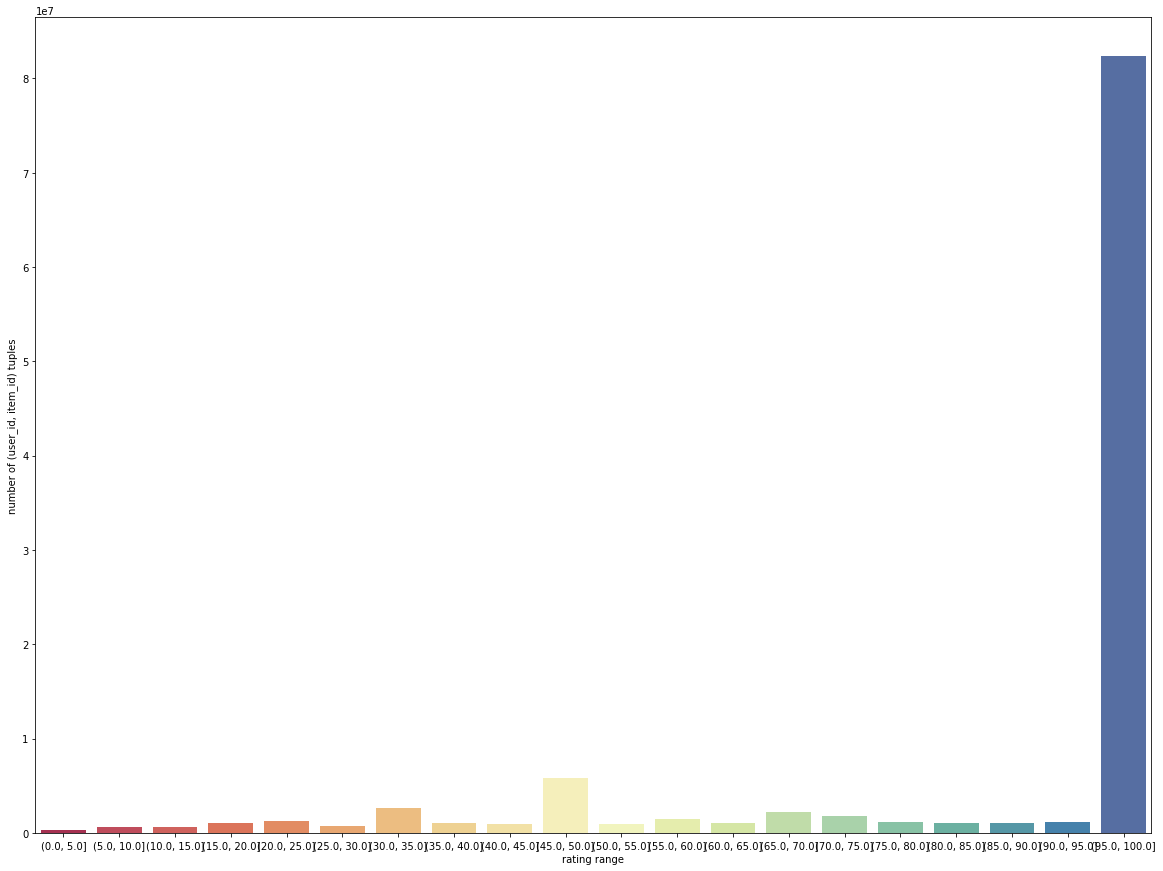

In [42]:
plt.figure(2, figsize=(20,15))
sns.barplot(
    x='rating',
    y='count',
    data=groups,
    palette='Spectral'
).set(
    xlabel='rating range',
    ylabel='number of (user_id, item_id) tuples'
)

In [43]:
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_ratings, Reader(rating_scale=(0, 1)))

In [44]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3506  0.3516  0.3511  0.3514  0.3506  0.3511  0.0004  
MAE (testset)     0.3104  0.3111  0.3104  0.3111  0.3102  0.3106  0.0004  
Fit time          60.42   61.78   60.50   61.68   60.62   61.00   0.60    
Test time         2.10    2.80    2.80    2.06    2.86    2.53    0.36    


{'test_rmse': array([0.35063411, 0.35161489, 0.35105073, 0.35141139, 0.35064698]),
 'test_mae': array([0.31036341, 0.3111347 , 0.31043757, 0.31109984, 0.31020542]),
 'fit_time': (60.41556096076965,
  61.77575325965881,
  60.50001645088196,
  61.68230128288269,
  60.62104272842407),
 'test_time': (2.1046199798583984,
  2.803011894226074,
  2.8023197650909424,
  2.0630364418029785,
  2.857908010482788)}

In [45]:
def predict(algo, user_id, item_id):
    _est, estimate = list(algo.predict(user_id, item_id)._asdict().items())[3]
    return estimate

In [46]:
user_id = '00RL8Z82B2Z1'
item_id = '6696574'
predict(algo, user_id, item_id)

0.6369822907726364

In [47]:
df_validation = pd.read_csv('../data/validation.csv')

In [48]:
df_target = df_validation[(df_validation['action_type'] == 'clickout item') & df_validation['reference'].isnull()]
df_target

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
4,0BO8K084XKYE,ad89aba9bb002,1541458805,5,clickout item,NaN,US,"Ledyard, USA",tablet,NaN,76028|70388|1336053|317126|79506|9979396|71272...,81|70|104|153|100|86|121|113|113|94|39|94|75|4...
11,0CI40GAHP96Q,74986cb514e04,1541456884,7,clickout item,NaN,BR,"Rio Quente, Brazil",mobile,NaN,1668387|2260908|3926372|2343438|2571941|257499...,49|30|31|60|354|280|33|50|307|56|64|273|52|27|40
38,0OQU0SD8LPT3,0570c0ad1a064,1541455563,27,clickout item,NaN,IT,"Leukerbad, Switzerland",mobile,NaN,28940|351361|28939|28930|28947|28926|28927|289...,225|177|424|161|201|194|153|175|157|204|159|33...
42,101QC20YANDM,86052262c2b01,1541456080,31,clickout item,NaN,UK,"Bristol, United Kingdom",tablet,NaN,12558|12563|12564|12568|12565|46606|47804|1257...,191|189|170|136|160|131|91|168|128|221|170|113...
47,1YXNJH0CVWD1,957660f1348c1,1541459188,5,clickout item,NaN,BR,"São Paulo, Brazil",mobile,Sort by Price,6703430|8136104|2707078|6935282|3145604|450574...,11|12|14|16|17|17|17|17|17|17|18|18|18|18|18|1...
51,2GUABJ97DL44,e7ae0d9b9548b,1541457420,4,clickout item,NaN,RU,"Rybinsk, Russia",mobile,NaN,2852220|1710581|2526176|4969070|2037901|321307...,76|19|29|28|37|56|36|31|20|23|32|34|19|40|133|...
52,2HMIJDJ4O1SM,10f6a151699ca,1541457984,1,clickout item,NaN,IE,"Dublin, Ireland",tablet,NaN,12509|12510|46119|16674|46149|640521|895195|12...,479|429|243|265|269|187|224|464|210|224|228|38...
78,2I3VJP0O4QN9,f700004a9608f,1541456853,26,clickout item,NaN,EC,"Fort Myers, USA",desktop,Sort by Price,63381|1416578|6174504|2518114|6297618|6946984|...,36|36|42|43|44|44|44|44|45|45|46|51|51|52|52|5...
90,2I49QL4EG4ZC,b46b69b053ea4,1541456935,12,clickout item,NaN,US,"Nashville, USA",mobile,NaN,75291|9293590|59561|78737|72439|9112834|956532...,155|259|117|57|220|175|350|210|249|119|284|219...
110,2N2RU0NDDZ88,9b028a29d99b1,1541456396,20,clickout item,NaN,HR,"City of Sarajevo, Bosnia and Herzegovina",mobile,NaN,6329130|409456|1555533|4503730|4133960|3480472...,15|72|72|101|30|89|79|15|93|75|86|70|58|30|40|...


In [49]:
def string_to_array(s):
    """Convert pipe separated string to array."""

    if isinstance(s, str):
        out = s.split("|")
    elif math.isnan(s):
        out = []
    else:
        raise ValueError("Value must be either string of nan")
    return out

In [50]:
def order_impressions_by_prediction(action):
    user_id = action['user_id']
    impressions = string_to_array(action['impressions'])
    predictions = {item_id: predict(algo, user_id, item_id) for item_id in impressions}
    sorted_impressions = sorted(impressions, key=lambda item_id: predictions[item_id], reverse=True)
    return ' '.join(sorted_impressions)

In [51]:
df_target['new_impressions'] = df_target.progress_apply(order_impressions_by_prediction, axis=1)
df_target

/home/tony/source/recsys-2019/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,new_impressions
4,0BO8K084XKYE,ad89aba9bb002,1541458805,5,clickout item,NaN,US,"Ledyard, USA",tablet,NaN,76028|70388|1336053|317126|79506|9979396|71272...,81|70|104|153|100|86|121|113|113|94|39|94|75|4...,55486 317126 1336053 318466 159320 893845 5982...
11,0CI40GAHP96Q,74986cb514e04,1541456884,7,clickout item,NaN,BR,"Rio Quente, Brazil",mobile,NaN,1668387|2260908|3926372|2343438|2571941|257499...,49|30|31|60|354|280|33|50|307|56|64|273|52|27|40,2574999 1668387 2343438 10202814 8288320 22609...
38,0OQU0SD8LPT3,0570c0ad1a064,1541455563,27,clickout item,NaN,IT,"Leukerbad, Switzerland",mobile,NaN,28940|351361|28939|28930|28947|28926|28927|289...,225|177|424|161|201|194|153|175|157|204|159|33...,28940 28939 9367854 28927 28947 1017768 28921 ...
42,101QC20YANDM,86052262c2b01,1541456080,31,clickout item,NaN,UK,"Bristol, United Kingdom",tablet,NaN,12558|12563|12564|12568|12565|46606|47804|1257...,191|189|170|136|160|131|91|168|128|221|170|113...,6609210 46606 12578 12579 12564 162276 1824633...
47,1YXNJH0CVWD1,957660f1348c1,1541459188,5,clickout item,NaN,BR,"São Paulo, Brazil",mobile,Sort by Price,6703430|8136104|2707078|6935282|3145604|450574...,11|12|14|16|17|17|17|17|17|17|18|18|18|18|18|1...,5998076 2707078 4827450 6703430 10727094 81361...
51,2GUABJ97DL44,e7ae0d9b9548b,1541457420,4,clickout item,NaN,RU,"Rybinsk, Russia",mobile,NaN,2852220|1710581|2526176|4969070|2037901|321307...,76|19|29|28|37|56|36|31|20|23|32|34|19|40|133|...,4572892 2852220 4500754 2526176 1710581 924579...
52,2HMIJDJ4O1SM,10f6a151699ca,1541457984,1,clickout item,NaN,IE,"Dublin, Ireland",tablet,NaN,12509|12510|46119|16674|46149|640521|895195|12...,479|429|243|265|269|187|224|464|210|224|228|38...,12509 46144 640521 12476 344771 46149 12472 89...
78,2I3VJP0O4QN9,f700004a9608f,1541456853,26,clickout item,NaN,EC,"Fort Myers, USA",desktop,Sort by Price,63381|1416578|6174504|2518114|6297618|6946984|...,36|36|42|43|44|44|44|44|45|45|46|51|51|52|52|5...,128767 60862 1007159 59952 68159 1416578 30822...
90,2I49QL4EG4ZC,b46b69b053ea4,1541456935,12,clickout item,NaN,US,"Nashville, USA",mobile,NaN,75291|9293590|59561|78737|72439|9112834|956532...,155|259|117|57|220|175|350|210|249|119|284|219...,318056 78737 73375 59561 2195742 75291 9293590...
110,2N2RU0NDDZ88,9b028a29d99b1,1541456396,20,clickout item,NaN,HR,"City of Sarajevo, Bosnia and Herzegovina",mobile,NaN,6329130|409456|1555533|4503730|4133960|3480472...,15|72|72|101|30|89|79|15|93|75|86|70|58|30|40|...,4133960 3480472 942569 5137244 6329130 6062428...


In [52]:
df_predicted = df_target[['user_id', 'session_id', 'timestamp', 'step', 'new_impressions']].rename(columns={'new_impressions': 'item_recommendations'})
df_predicted

,user_id,session_id,timestamp,step,item_recommendations
4,0BO8K084XKYE,ad89aba9bb002,1541458805,5,55486 317126 1336053 318466 159320 893845 5982...
11,0CI40GAHP96Q,74986cb514e04,1541456884,7,2574999 1668387 2343438 10202814 8288320 22609...
38,0OQU0SD8LPT3,0570c0ad1a064,1541455563,27,28940 28939 9367854 28927 28947 1017768 28921 ...
42,101QC20YANDM,86052262c2b01,1541456080,31,6609210 46606 12578 12579 12564 162276 1824633...
47,1YXNJH0CVWD1,957660f1348c1,1541459188,5,5998076 2707078 4827450 6703430 10727094 81361...
51,2GUABJ97DL44,e7ae0d9b9548b,1541457420,4,4572892 2852220 4500754 2526176 1710581 924579...
52,2HMIJDJ4O1SM,10f6a151699ca,1541457984,1,12509 46144 640521 12476 344771 46149 12472 89...
78,2I3VJP0O4QN9,f700004a9608f,1541456853,26,128767 60862 1007159 59952 68159 1416578 30822...
90,2I49QL4EG4ZC,b46b69b053ea4,1541456935,12,318056 78737 73375 59561 2195742 75291 9293590...
110,2N2RU0NDDZ88,9b028a29d99b1,1541456396,20,4133960 3480472 942569 5137244 6329130 6062428...


In [53]:
df_predicted.to_csv('../data/validation_svd_relative_interaction_rating.csv', index=False)